In [40]:
%matplotlib inline

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float, array

In [41]:
df = pd.read_csv('C:/workfiles/denver-crime-data/crime.csv')
#read the dataset in using local storage

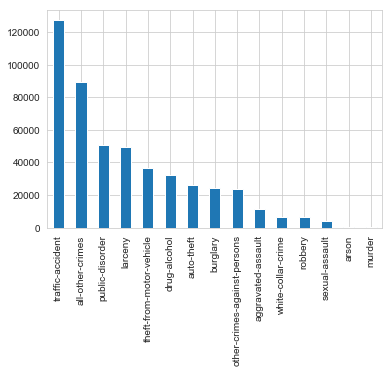

In [42]:
df['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
#created a quick bar chart of the occurances of crime to get a feel of what crime occurs the most

In [43]:
df.head()
#quick overview of the dataset

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [44]:
df1 = df.drop(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'INCIDENT_ADDRESS', 
               'IS_CRIME', 'IS_TRAFFIC','LAST_OCCURRENCE_DATE','NEIGHBORHOOD_ID','OFFENSE_TYPE_ID', 'GEO_X', 'GEO_Y', 
               'REPORTED_DATE', 'FIRST_OCCURRENCE_DATE',], axis= 1)
df1.head()
#dropping the columns that are not necessary for the analysis

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
0,all-other-crimes,-104.809881,39.773188,5,521
1,larceny,-104.781434,39.785649,5,522
2,theft-from-motor-vehicle,-104.957381,39.663490,3,314
3,larceny,-104.941440,39.702698,3,312
4,larceny,-104.955370,39.717107,3,311


In [45]:
df1.dtypes
#taking a quick look at what primitive type each column is

OFFENSE_CATEGORY_ID     object
GEO_LON                float64
GEO_LAT                float64
DISTRICT_ID              int64
PRECINCT_ID              int64
dtype: object

In [46]:
df1.count()
#took a quick count to see if there are any missing values

OFFENSE_CATEGORY_ID    488283
GEO_LON                484260
GEO_LAT                484260
DISTRICT_ID            488283
PRECINCT_ID            488283
dtype: int64

In [47]:
df1.count() - 488283
#as is shown below there was about 4000 points missing in the latitiude and logitude columns given

OFFENSE_CATEGORY_ID       0
GEO_LON               -4023
GEO_LAT               -4023
DISTRICT_ID               0
PRECINCT_ID               0
dtype: int64

In [48]:
df1 = df1.dropna(axis=0, how='any')
df1.count()
#next I dropped all of the missing values

OFFENSE_CATEGORY_ID    484260
GEO_LON                484260
GEO_LAT                484260
DISTRICT_ID            484260
PRECINCT_ID            484260
dtype: int64

In [49]:
#df1 = df1[df.OFFENSE_CATEGORY_ID != 'all-other-crimes']
#df1.count()
#the following three code blocks are when I started experimenting with different models and trying to find the best one

In [50]:
#df1 = df1[df.OFFENSE_CATEGORY_ID != 'traffic-accident']
#df1.count()

In [51]:
#df1 = df1[df.OFFENSE_CATEGORY_ID != 'sexual-assault']
#df1.count()

In [52]:
df1.describe()
#Taking a quick look at the spread of the data

,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
count,484260.000000,484260.000000,484260.000000,484260.000000
mean,-104.928874,39.719498,3.489512,366.437286
std,1.896927,0.718339,1.772062,177.936159
min,-105.321797,0.000001,1.000000,111.000000
25%,-105.008656,39.707590,2.000000,221.000000
50%,-104.982527,39.739773,3.000000,323.000000
75%,-104.924820,39.758557,5.000000,521.000000
max,-0.000001,39.904311,7.000000,759.000000


In [53]:
df1 = df1.loc[df1['OFFENSE_CATEGORY_ID'].isin(['white-collar-crime','robbery'])]
df1.count()
#finally settling down to the white-collar crime vs. robbery model

OFFENSE_CATEGORY_ID    12876
GEO_LON                12876
GEO_LAT                12876
DISTRICT_ID            12876
PRECINCT_ID            12876
dtype: int64

In [54]:
df1.groupby('OFFENSE_CATEGORY_ID').size()
#to show that they are simular in occurance

OFFENSE_CATEGORY_ID
robbery               6316
white-collar-crime    6560
dtype: int64

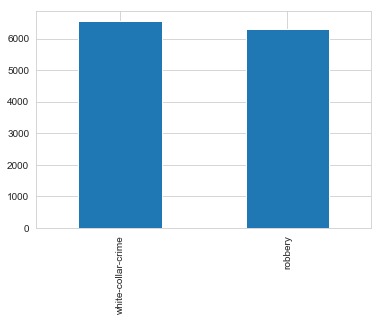

In [55]:
df1['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
#quick bar chart of the data

In [58]:
#I used the below reference for creating the model and charts described below
#Skalski, P. (2016) K Nearest Neighbor. Retrieved from 
#https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

#assigned the x and y values 
feature_columns = ['GEO_LON','GEO_LAT','DISTRICT_ID','PRECINCT_ID']
X = df1[feature_columns].values
y = df1['OFFENSE_CATEGORY_ID'].values

#imported the label encoder for the y variable because it was all in string
le = LabelEncoder()
y = le.fit_transform(y)

#created the test train split 80/20 datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

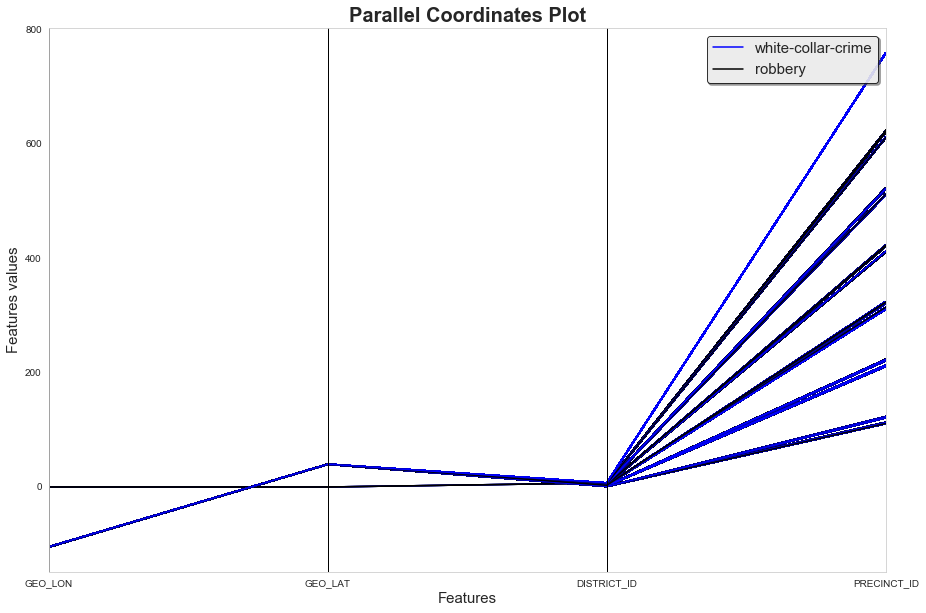

In [59]:
#created a new variable ID which is just the row number so that I could create the graphs
df1['ID'] = np.arange(len(df1))

#creating parallel coordinates plot 
plt.figure(figsize=(15,10))
parallel_coordinates(df1.drop("ID", axis=1), "OFFENSE_CATEGORY_ID", color = ['blue', 'black'])
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

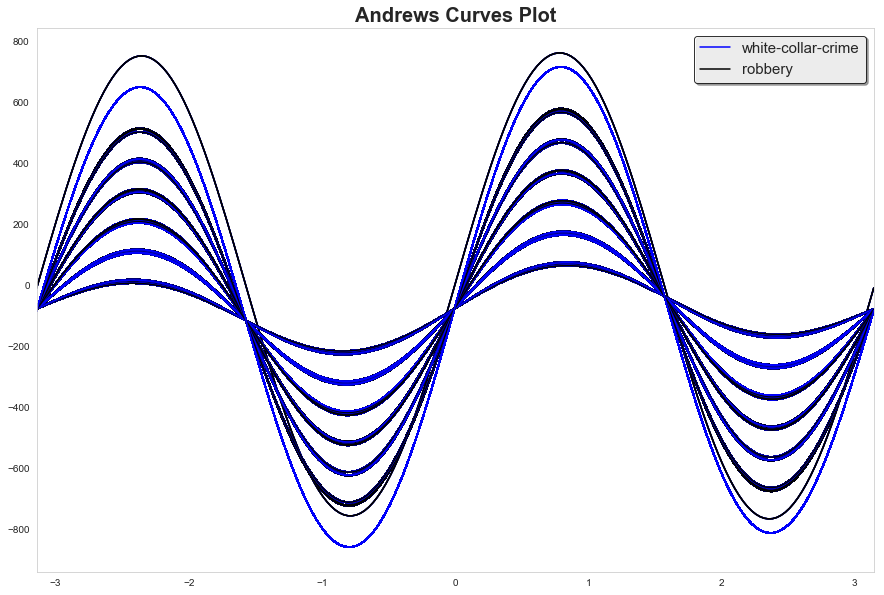

In [60]:
#creating andrews curve
plt.figure(figsize=(15,10))
andrews_curves(df1.drop("ID", axis=1), "OFFENSE_CATEGORY_ID", color = ['blue', 'black'])
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


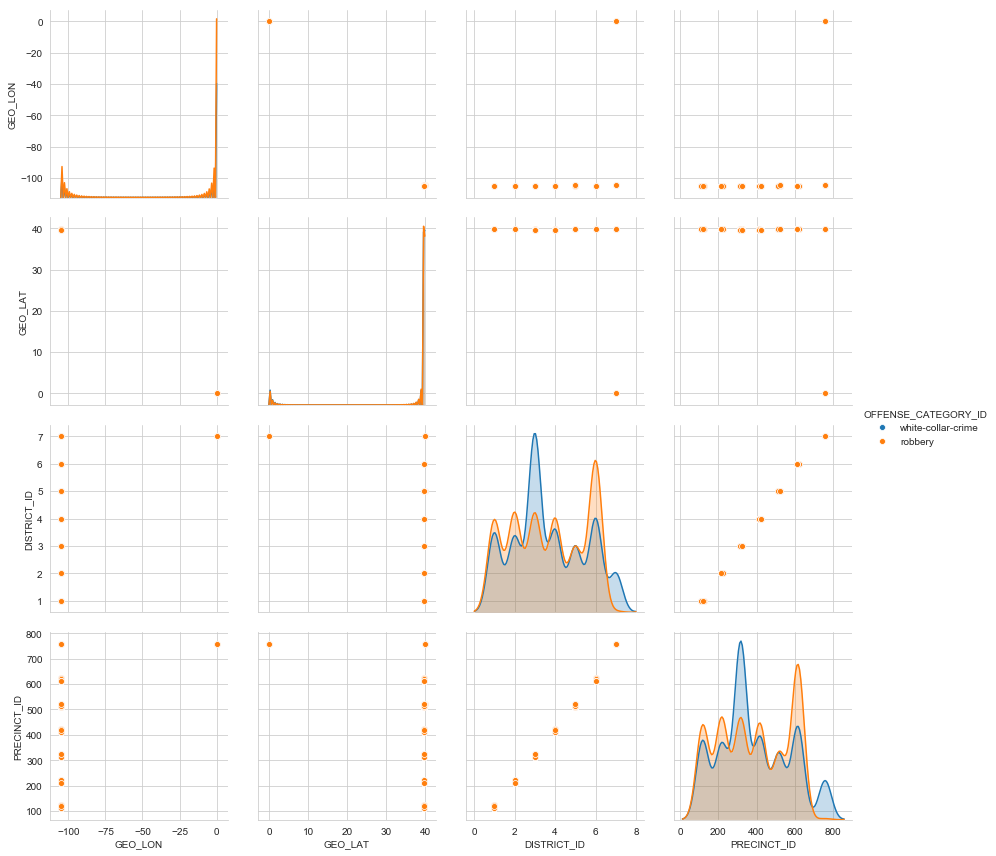

In [61]:
#created a pair plot which shows the different graphs
plt.figure()
sns.pairplot(df1.drop("ID", axis=1), hue = "OFFENSE_CATEGORY_ID", height=3)
plt.show()

In [63]:
#specify how many neighbors are needed for the model, in this case is 3 based off the image below orginally 2
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the training set to the model
classifier.fit(X_train, y_train)

# testing the model on the data
y_pred = classifier.predict(X_test)

In [64]:
#creating a confusion matrix of the data
cm = confusion_matrix(y_test, y_pred)
cm

array([[826, 437],
       [457, 856]], dtype=int64)

In [65]:
#printing out the percent accuracy the model had with the test dataset
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 65.3 %.


In [66]:
# making a list of k
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

#10-fold cross-validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

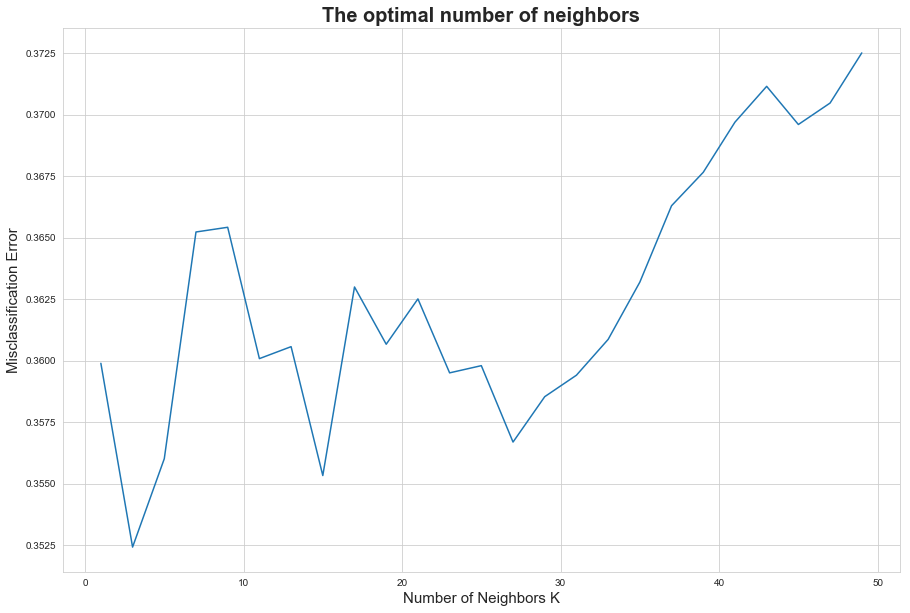

In [67]:
#creating an image of the optimal number of neighbors as is shown below
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [68]:
#finding the optimal number of neighbors as is shown in the image above
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of clusters is %d." % best_k)

The optimal number of clusters is 3.


In [69]:
# using the label enoder for the model below for crime category
label_encoder = preprocessing.LabelEncoder() 
df1['OFFENSE_CATEGORY_ID']= label_encoder.fit_transform(df1['OFFENSE_CATEGORY_ID']) 
df1['OFFENSE_CATEGORY_ID'].unique()
df1 = df1.drop(['ID'], axis=1)
df1.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID
18,1,-104.980747,39.701835,3,312
25,1,-104.901787,39.652260,3,324
72,0,-104.999219,39.733952,1,123
101,0,-104.958432,39.698094,3,312
144,0,-104.887577,39.739848,2,223


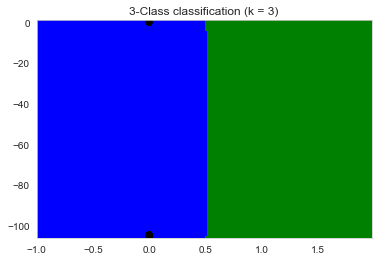

In [71]:
#I used the below reference to create the model
#Python Tutorials (2015) k nearest neighbors. Retrieved from https://pythonspot.com/k-nearest-neighbors/

#determined the number of clusters as was already established in the above models
n_neighbors = 3


#assign x and y coordinates to x and category to y. 
X = df1.iloc[:, :2]
y = df1.OFFENSE_CATEGORY_ID
h = .02

# next we assigned the colors needed for the image
cmap_light = ListedColormap(['blue', 'black','green'])
cmap_bold = ListedColormap(['black', 'blue', 'green'])

# fitting the data to the model
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# finding min max limits
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# use the model to predict the crime
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#graph the image of how the model clusted
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#additionally put the points of the data on the chart
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()